In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Taxi%20trip%20data%20NYC/taxi_tripdata.csv")

In [4]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [5]:
df.shape

(83691, 20)

In [6]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


In [7]:
df.dtypes

VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [8]:
df = df.drop(['ehail_fee', 'VendorID', 'trip_type', 'congestion_surcharge'], axis= 1)

In [9]:
len(df[df['total_amount'] <= 0])

394

In [10]:
df = df[df['total_amount'] > 0]
len(df[df['fare_amount'] <= 0])

50

In [11]:
len(df[df['trip_distance'] <= 0])

3263

In [12]:
df.groupby('RatecodeID')['trip_distance'].median()

RatecodeID
1.0     2.00
2.0    17.32
3.0     0.11
4.0    11.90
5.0     1.27
Name: trip_distance, dtype: float64

In [13]:
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 1.0)] = 2.8
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 2.0)] = 20
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 3.0)] = 24
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 4.0)] = 12
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 5.0)] = 3.1
for i in df.columns[[0, 1]]:
    df[i] = pd.to_datetime(df[i])

In [16]:
df.shape

(83297, 16)

In [17]:
df['store_and_fwd_flag'].value_counts()

N      48040
2.8     2091
3.1      496
Y        130
20        19
24         7
Name: store_and_fwd_flag, dtype: int64

In [18]:
df['store_and_fwd_flag'].fillna('N', inplace= True)
df['payment_type'].value_counts(normalize= True)

1.0     0.550598
2.0     0.394541
2.8     0.041175
3.1     0.009767
3.0     0.002993
4.0     0.000394
20.0    0.000374
24.0    0.000138
5.0     0.000020
Name: payment_type, dtype: float64

In [19]:
df.groupby('payment_type')['total_amount'].quantile(0.95)

payment_type
1.0     63.8500
2.0     30.3000
2.8      2.8000
3.0     31.4750
3.1      3.1000
4.0     19.3375
5.0     39.5500
20.0    20.0000
24.0    24.0000
Name: total_amount, dtype: float64

In [20]:
df.loc[(df['payment_type'].isna()) & (df['total_amount'] > 50), 'payment_type'] = 1.0
df.loc[(df['payment_type'].isna()) & (df['total_amount'] <= 50), 'payment_type'] = 2.0
df['RatecodeID'].value_counts()

1.0     46672
2.8      2091
5.0      1302
3.1       496
2.0       138
4.0        41
20.0       19
3.0        17
24.0        7
Name: RatecodeID, dtype: int64

In [21]:
df.groupby('RatecodeID')['total_amount'].quantile(0.95)

RatecodeID
1.0      49.2545
2.0      79.3500
2.8       2.8000
3.0     137.6020
3.1       3.1000
4.0     184.2100
5.0      65.5090
20.0     20.0000
24.0     24.0000
Name: total_amount, dtype: float64

In [22]:
df.loc[(df['RatecodeID'].isna()) & (df['total_amount'] >= 184), 'RatecodeID'] = 4.0
df.loc[(df['RatecodeID'].isna()) & (138 <= df['total_amount']) & (df['total_amount']< 184), 'RatecodeID'] = 3.0
df.loc[(df['RatecodeID'].isna()) & (79 <= df['total_amount']) & (df['total_amount']< 138), 'RatecodeID'] = 2.0
df.loc[(df['RatecodeID'].isna()) & (0 <= df['total_amount']) & (df['total_amount']< 79), 'RatecodeID'] = 1.0
df['passenger_count'].value_counts(normalize= True)

1.0     0.814091
2.0     0.074415
2.8     0.041175
5.0     0.023925
6.0     0.020026
3.0     0.011756
3.1     0.009767
4.0     0.003485
0.0     0.000788
20.0    0.000374
24.0    0.000138
7.0     0.000039
32.0    0.000020
Name: passenger_count, dtype: float64

In [23]:
df.loc[df['passenger_count']==0, 'passenger_count'] = 1.0
df.loc[df['passenger_count']==7, 'passenger_count'] = 1.0
df.loc[df['passenger_count']==32, 'passenger_count'] = 1.0
df.loc[df['passenger_count'].isna(), 'passenger_count'] = 1.0
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
dtype: int64

In [24]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74.0,168.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116.0,265.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97.0,33.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74.0,42.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42.0,244.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0


In [26]:
df.shape

(83297, 16)

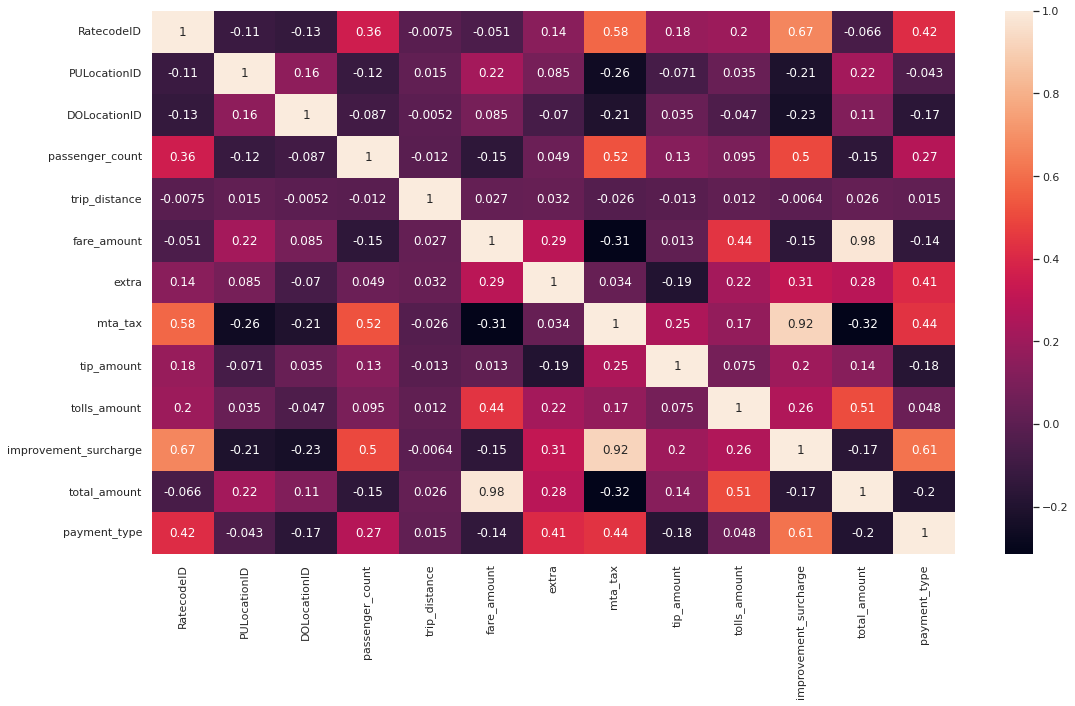

In [27]:
plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), annot= True);

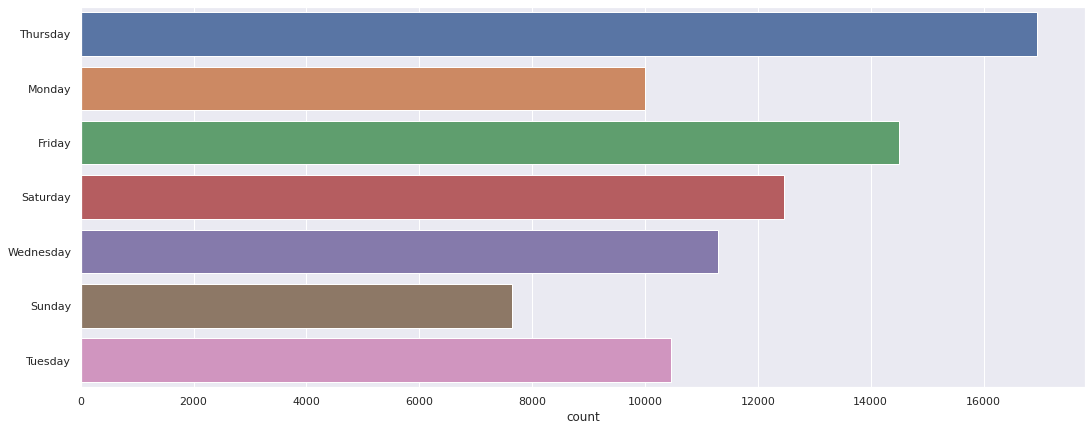

In [28]:
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()
plt.figure(figsize= (18, 7))
sns.countplot(y= 'day_of_week', data= df)
plt.ylabel('');

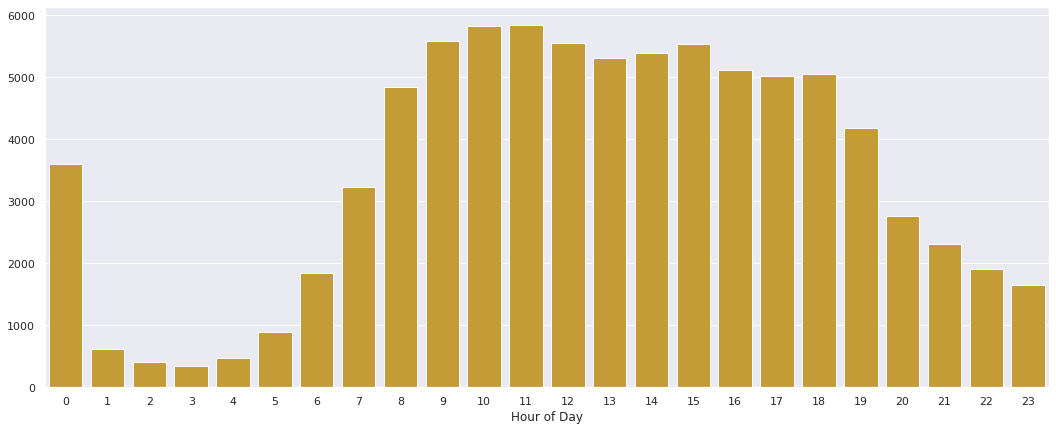

In [29]:
plt.figure(figsize= (18, 7))
sns.countplot(x= df['lpep_pickup_datetime'].dt.hour, data= df, color= 'goldenrod')
plt.ylabel('')
plt.xlabel('Hour of Day');